# Read data 

In [2]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('/home/alhelal/Desktop/Ismail_IDS_project_2023/Cybersecurity-Intrusion-detection--main/Independent Study/Windows_data/windows10_dataset.csv',na_values=[' '])
df.head()

,ts,Processor_DPC_Rate,Processor_pct_ Idle_Time,Processor_pct_ C3_Time,Processor_pct_ Interrupt_Time,Processor_pct_ C2_Time,Processor_pct_ User_Time,Processor_pct_ C1_Time,Processor_pct_ Processor_Time,Processor_C1_ransitions_sec,...,LogicalDisk(_Total) Avg Disk Write Queue Length,LogicalDisk(_Total) Avg Disk Queue Length,LogicalDisk(_Total) pct_ Disk Read Time,LogicalDisk(_Total) Disk Write Bytes sec,LogicalDisk(_Total) Disk Transfers sec,LogicalDisk(_Total) Avg Disk Bytes Transfer,LogicalDisk(_Total) pct_ Disk Write Time,LogicalDisk(_Total) Avg Disk sec Transfer,label,type
0,1554206309,4,29.908172,0.0,0.078240,0.0,61.027509,29.908172,66.200149,480.094991,...,0.134876,0.163098,2.822198,1.924988e+06,402.582784,9100.481592,13.487612,0.000405,0,normal
1,1554206319,9,31.751682,0.0,0.312521,0.0,59.144594,31.751682,66.247735,427.041284,...,0.157564,0.189279,3.171506,1.497233e+06,355.134332,11153.554490,15.756429,0.000533,0,normal
2,1554206329,5,29.495167,0.0,1.168222,0.0,46.027940,29.495167,66.900381,1159.426821,...,0.401774,0.782472,38.069810,1.854229e+06,760.431768,26994.265950,40.177378,0.001028,0,normal
3,1554206339,12,18.224375,0.0,1.097192,0.0,47.806219,18.224375,79.545208,736.622011,...,0.259062,0.768934,50.987167,1.591239e+07,699.499954,53141.663800,25.906233,0.001099,0,normal
4,1554206349,12,14.861187,0.0,1.562431,0.0,41.873151,14.861187,82.735137,896.108598,...,0.103836,1.081730,97.789353,2.360930e+07,1184.550425,40988.684440,10.383619,0.000913,0,normal


In [3]:
# Get the dimensions of the DataFrame
rows, columns = df.shape

# Print the dimensions
print("Number of rows:", rows)
print("Number of columns:", columns)

Number of rows: 35975
Number of columns: 127


In [4]:
# Calculate the percentage of missing values per column
missing_values_percent = (df.isna().sum() / len(df)) * 100

# Sort the values in descending order
missing_values_percent = missing_values_percent.sort_values(ascending=False)

# Print the result
missing_values_percent.head(10)


Process_IO Read Bytes_sec          1.495483
Process_IO Read_Operations_sec     1.164698
Process_IO Data Operations_sec     0.920083
Process_IO Other Operations_sec    0.683808
Process_IO Data Bytes_sec          0.678249
Process_Page Faults_sec            0.644892
Process_IO_Other_Bytes_sec         0.517026
Process_pct_ User_Time             0.508687
Process_IO_Write Operations_sec    0.428075
Process_IO_Write_Bytes_sec         0.325226
dtype: float64

In [5]:
# Missing value is less than 1.5%, so we can drop them and use the complete case.

# Remove rows with any missing values
df = df.dropna()

In [6]:
# Get the dimensions of the DataFrame
rows, columns = df.shape

# Print the dimensions
print("Number of rows:", rows)
print("Number of columns:", columns)

Number of rows: 35214
Number of columns: 127


In [7]:
# Identify columns with only a single unique value
single_value_columns = df.columns[df.nunique() == 1]
single_value_columns

Index(['Processor_pct_ C3_Time', 'Processor_pct_ C2_Time',
       'Processor_C2_ransitions_sec', 'Processor_C3_ransitions_sec',
       'Process_Elapsed_Time', 'Process_Creating Process ID',
       'Process_ID Process', 'Process_Priority Base',
       'Network_I(Intel R _82574L_GNC) Packets Received Unknown',
       'Network_I(Intel R _82574L_GNC) Packets Outbound Errors',
       'Network_I(Intel R _82574L_GNC) Packets Received Discarded',
       'Network_I(Intel R _82574L_GNC) Packets Outbound Discarded',
       'Network_I(Intel R _82574L_GNC) TCP RSC Exceptions sec',
       'Network_I(Intel R _82574L_GNC) Output Queue Length',
       'Network_I(Intel R _82574L_GNC) Packets Sent Non-Unicast sec',
       'Network_I(Intel R _82574L_GNC) Packets Received Non-Unicast sec',
       'Network_I(Intel R _82574L_GNC) TCP RSC Coalesced Packets sec',
       'Network_I(Intel R _82574L_GNC) Offloaded Connections',
       'Network_I(Intel R _82574L_GNC) Packets Received Errors'],
      dtype='object'

In [8]:
df = df.drop(columns=single_value_columns)

In [9]:
# Get the dimensions of the DataFrame after dropping unnecessary columns
rows, columns = df.shape

# Print the dimensions
print("Number of rows:", rows)
print("Number of columns:", columns)

Number of rows: 35214
Number of columns: 108


We removed the missing entries and remove the variables which have only a single value for all the etries or variability was zero.

# Required Libraries

We are going to use Windows 10 system generated values to predict whether the system is under cyber attack or not !

In [10]:
import numpy as np
from numpy.ma.core import ceil
from scipy.spatial import distance #distance calculation
from sklearn.preprocessing import MinMaxScaler #normalisation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score #scoring
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Loading the data and EDA


In [11]:
# Attack counts by type:
pd.crosstab(index=df['label'], columns=df['type'])

type,ddos,dos,injection,mitm,normal,password,scanning,xss
label,,,,,,,,
0,0,0,0,0,24283,0,0,0
1,4539,505,606,13,0,3594,434,1240


In [12]:
df = df.drop(columns='ts')

# Making the data balance (Under sampling)

In [319]:
#df = df_new

In [13]:
freq = df['label'].value_counts()
freq

0    24283
1    10931
Name: label, dtype: int64

In [14]:
def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return my_format

#plt.pie(mydata,labels = mylabels, autopct=autopct_format(mydata))

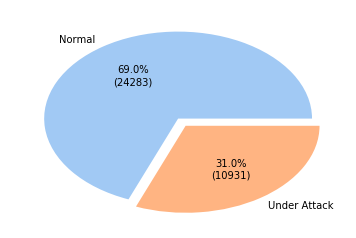

In [15]:
import matplotlib.pyplot as plt
import seaborn
  
# declaring data
data = [freq[0], freq[1]]
keys = ['Normal', 'Under Attack']
  
# declaring exploding pie
explode = [0, 0.1]
# define Seaborn color palette to use
palette_color = seaborn.color_palette('pastel')
  
# plotting data on chart
plt.pie(data, labels=keys, colors=palette_color,
        explode=explode, autopct=autopct_format(data))
  
# displaying chart
plt.show()

In [16]:
freq = df['label'].value_counts()
delete_frac = round((freq[0] - freq[1])/freq[0],2)
df = df.drop(df.query('label == 0').sample(frac= delete_frac).index)
df['label'].value_counts()

1    10931
0    10927
Name: label, dtype: int64

In [17]:
df.shape

(21858, 107)

# Investigating the correlation

In [18]:
X = df.iloc[:,0:105]

In [19]:
cormat = X.corr()
round(cormat,2)

,Processor_DPC_Rate,Processor_pct_ Idle_Time,Processor_pct_ Interrupt_Time,Processor_pct_ User_Time,Processor_pct_ C1_Time,Processor_pct_ Processor_Time,Processor_C1_ransitions_sec,Processor_pct_ DPC_Time,Processor_pct_ Privileged_Time,Processor_DPCs_Queued_sec,...,LogicalDisk(_Total) pct_ Disk Time,LogicalDisk(_Total) Avg Disk Bytes Read,LogicalDisk(_Total) Avg Disk Write Queue Length,LogicalDisk(_Total) Avg Disk Queue Length,LogicalDisk(_Total) pct_ Disk Read Time,LogicalDisk(_Total) Disk Write Bytes sec,LogicalDisk(_Total) Disk Transfers sec,LogicalDisk(_Total) Avg Disk Bytes Transfer,LogicalDisk(_Total) pct_ Disk Write Time,LogicalDisk(_Total) Avg Disk sec Transfer
Processor_DPC_Rate,1.00,-0.25,0.06,0.03,-0.25,0.20,0.70,0.46,0.33,0.79,...,0.54,0.02,0.12,0.71,0.67,0.54,0.76,-0.00,0.05,0.00
Processor_pct_ Idle_Time,-0.25,1.00,-0.42,-0.85,1.00,-0.99,-0.21,-0.43,-0.77,-0.31,...,-0.23,-0.21,-0.11,-0.27,-0.26,-0.33,-0.32,-0.04,-0.05,-0.10
Processor_pct_ Interrupt_Time,0.06,-0.42,1.00,0.19,-0.42,0.41,0.08,0.48,0.53,0.09,...,0.09,0.06,0.10,0.04,0.07,0.16,0.03,0.12,0.08,0.08
Processor_pct_ User_Time,0.03,-0.85,0.19,1.00,-0.85,0.87,-0.07,0.16,0.33,0.04,...,0.03,0.21,0.03,0.03,0.04,0.09,0.06,0.05,0.00,0.07
Processor_pct_ C1_Time,-0.25,1.00,-0.42,-0.85,1.00,-0.99,-0.21,-0.43,-0.77,-0.31,...,-0.23,-0.21,-0.11,-0.27,-0.26,-0.33,-0.32,-0.04,-0.05,-0.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LogicalDisk(_Total) Disk Write Bytes sec,0.54,-0.33,0.16,0.09,-0.33,0.27,0.71,0.32,0.39,0.65,...,0.63,0.18,0.34,0.67,0.65,1.00,0.68,0.14,0.25,0.08
LogicalDisk(_Total) Disk Transfers sec,0.76,-0.32,0.03,0.06,-0.32,0.26,0.88,0.43,0.42,0.94,...,0.64,0.02,0.17,0.84,0.79,0.68,1.00,-0.03,0.07,-0.01
LogicalDisk(_Total) Avg Disk Bytes Transfer,-0.00,-0.04,0.12,0.05,-0.04,0.04,0.02,0.17,0.02,0.00,...,0.02,0.21,0.04,-0.01,-0.01,0.14,-0.03,1.00,0.04,0.12
LogicalDisk(_Total) pct_ Disk Write Time,0.05,-0.05,0.08,0.00,-0.05,0.02,0.13,0.01,0.03,0.07,...,0.67,0.14,0.99,0.31,0.20,0.25,0.07,0.04,1.00,0.48


AttributeError: Unknown property pad

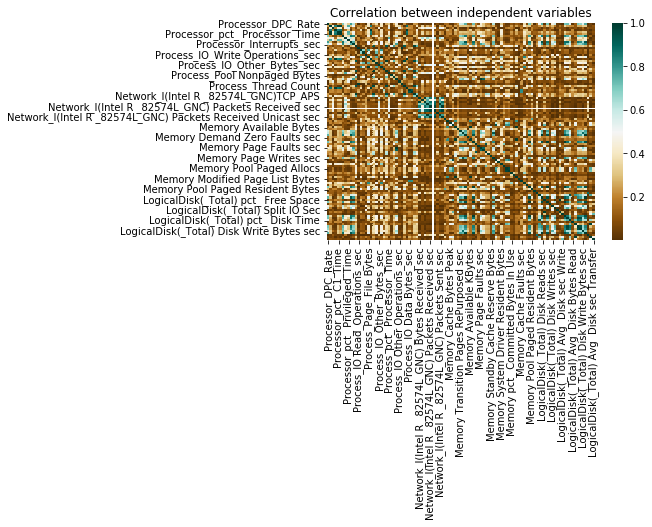

In [20]:
import seaborn as sns
mask = np.triu(np.ones_like(X.corr().abs(), dtype=np.bool))

heatmap = sns.heatmap(X.corr().abs(),annot=False,cmap='BrBG')
heatmap.set_title('Correlation between independent variables', fontdict={'fontsize':12}, pad=10);

In [21]:
# calculate the correlation matrix and reshape
df_corr = X.corr().abs().stack().reset_index()

# rename the columns
df_corr.columns = ['FEATURE_1', 'FEATURE_2', 'CORRELATION']
df_corr.head()

,FEATURE_1,FEATURE_2,CORRELATION
0,Processor_DPC_Rate,Processor_DPC_Rate,1.000000
1,Processor_DPC_Rate,Processor_pct_ Idle_Time,0.252472
2,Processor_DPC_Rate,Processor_pct_ Interrupt_Time,0.057765
3,Processor_DPC_Rate,Processor_pct_ User_Time,0.033407
4,Processor_DPC_Rate,Processor_pct_ C1_Time,0.252472


In [22]:
df_corr = df_corr[df_corr['FEATURE_1'] != df_corr['FEATURE_2']]

In [23]:
df_corr_perfect = df_corr[df_corr.CORRELATION == 1]

In [24]:
df_corr_perfect

,FEATURE_1,FEATURE_2,CORRELATION
108,Processor_pct_ Idle_Time,Processor_pct_ C1_Time,1.0
417,Processor_pct_ C1_Time,Processor_pct_ Idle_Time,1.0
1685,Process_Page_File Bytes,Process_Private_Bytes,1.0
2200,Process_Private_Bytes,Process_Page_File Bytes,1.0
4099,Network_I(Intel R _82574L_GNC) Packets Sent Un...,Network_I(Intel R _82574L_GNC) Packets Sent sec,1.0
4204,Network_I(Intel R _82574L_GNC) Packets Receive...,Network_I(Intel R _82574L_GNC) Packets Receive...,1.0
4511,Network_I(Intel R _82574L_GNC) Packets Sent sec,Network_I(Intel R _82574L_GNC) Packets Sent Un...,1.0
4616,Network_I(Intel R _82574L_GNC) Packets Receive...,Network_I(Intel R _82574L_GNC) Packets Receive...,1.0
5151,Memory Available Bytes,Memory Available KBytes,1.0
5769,Memory Available KBytes,Memory Available Bytes,1.0


In [25]:
# Relabel the row numbers
df_corr_perfect.reset_index(drop=True, inplace=True)

# Delete even rows
df_corr_perfect = df_corr_perfect[df_corr_perfect.index % 2 != 0]
df_corr_perfect


,FEATURE_1,FEATURE_2,CORRELATION
1,Processor_pct_ C1_Time,Processor_pct_ Idle_Time,1.0
3,Process_Private_Bytes,Process_Page_File Bytes,1.0
5,Network_I(Intel R _82574L_GNC) Packets Receive...,Network_I(Intel R _82574L_GNC) Packets Receive...,1.0
7,Network_I(Intel R _82574L_GNC) Packets Receive...,Network_I(Intel R _82574L_GNC) Packets Receive...,1.0
9,Memory Available KBytes,Memory Available Bytes,1.0


In [26]:
lst1 = df_corr_perfect.FEATURE_1
remove_var = list(set(lst1))

In [27]:
df = df.drop(remove_var, axis=1)

In [28]:
df.shape

(21858, 102)

In [29]:
df.head()

,Processor_DPC_Rate,Processor_pct_ Idle_Time,Processor_pct_ Interrupt_Time,Processor_pct_ User_Time,Processor_pct_ Processor_Time,Processor_C1_ransitions_sec,Processor_pct_ DPC_Time,Processor_pct_ Privileged_Time,Processor_DPCs_Queued_sec,Processor_Interrupts_sec,...,LogicalDisk(_Total) Avg Disk Write Queue Length,LogicalDisk(_Total) Avg Disk Queue Length,LogicalDisk(_Total) pct_ Disk Read Time,LogicalDisk(_Total) Disk Write Bytes sec,LogicalDisk(_Total) Disk Transfers sec,LogicalDisk(_Total) Avg Disk Bytes Transfer,LogicalDisk(_Total) pct_ Disk Write Time,LogicalDisk(_Total) Avg Disk sec Transfer,label,type
2,5,29.495167,1.168222,46.027940,66.900381,1159.426821,0.233644,20.872230,917.339935,4418.832843,...,0.401774,0.782472,38.069810,1.854229e+06,760.431768,26994.26595,40.177378,0.001028,0,normal
3,12,18.224375,1.097192,47.806219,79.545208,736.622011,0.313483,31.740194,894.340589,6617.558513,...,0.259062,0.768934,50.987167,1.591239e+07,699.499954,53141.66380,25.906233,0.001099,0,normal
6,9,19.296817,2.734334,35.077595,75.781616,1665.275721,0.624991,40.702510,1290.768735,5719.833989,...,0.072069,1.082287,101.021753,2.044406e+07,1103.615271,32610.07958,7.206940,0.000981,0,normal
8,3,23.961375,0.624038,39.626426,72.854338,2141.205491,0.234014,33.230035,639.116640,5112.134350,...,0.098541,0.251544,15.300358,1.462362e+07,439.024507,65097.94132,9.854080,0.000573,0,normal
10,52,56.220035,0.780054,23.323609,37.127663,1427.130982,0.078005,13.806952,1280.054515,2352.824071,...,0.020561,0.648671,62.811001,6.107684e+06,1128.484878,11238.99345,2.056146,0.000575,0,normal


In [30]:
# Remove the multiple attack types column
df = df.drop('type', axis=1)

## Seperating independent and dependent variables:

In [31]:
# Removing Y and Id
X = df.iloc [: ,:-1].values    # independent variables
# Keeping only Y
y = df.iloc [: , -1].values    # dependent variables

## Handling Inf values:


In [32]:
import numpy as np

# find min and max values for each column, ignoring nan, -inf, and inf
mins = [np.nanmin(X[:, i][X[:, i] != -np.inf]) for i in range(X.shape[1])]
maxs = [np.nanmax(X[:, i][X[:, i] != np.inf]) for i in range(X.shape[1])]

# go through matrix one column at a time and replace  + and -infinity 
# with the max or min for that column
for i in range(X.shape[1]):
    X[:, i][X[:, i] == -np.inf] = mins[i]
    X[:, i][X[:, i] == np.inf] = maxs[i]

## Standardizing all numerical columns 

In [33]:
# feature Scaling
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

In [34]:
df.shape

(21858, 101)

# Train test Split

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,test_size=0.2)

# Supervised Model selection

In [36]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn import metrics
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, 
                             classification_report, f1_score, average_precision_score, precision_recall_fscore_support)

In [37]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [10,20,50],
            'kernel': ['rbf','poly','sigmoid','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [50,100,200],
            'max_features': ['auto', 'sqrt', 'log2'],
            'max_depth' : [5,15,25],
            'criterion' : ['gini', 'entropy']
        }
    }
}

In [38]:
import time
start = time.time()

scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
model_output = pd.DataFrame(scores,columns=['model','best_score','best_params'])


end = time.time()
hours, rem = divmod(end-start, 3600)
minutes, seconds = divmod(rem, 60)
print("Execution time: "+"{:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds))

Execution time: 00:35:44.83


In [52]:
model_output

,model,best_score,best_params
0,svm,0.971063,"{'C': 50, 'kernel': 'linear'}"
1,random_forest,0.987933,"{'criterion': 'entropy', 'max_depth': 25, 'max..."


In [53]:
model_output.best_params[0]

{'C': 50, 'kernel': 'linear'}

In [58]:
svm= SVC(gamma='auto',C = 50,kernel = 'linear') 
svm.fit(X_train, y_train)
# Measure model performance
y_pred_svm = svm.predict(X_test)

In [61]:
# Calculate the metrics
print('Test Accuracy: %.3f' % accuracy_score(y_test, y_pred_svm))
print('Test Precision: %.3f' % precision_score(y_test, y_pred_svm))
print('Test Recall: %.3f' % recall_score(y_test, y_pred_svm))
print('Test F-1: %.3f' % f1_score(y_test, y_pred_svm))

Test Accuracy: 0.968
Test Precision: 0.949
Test Recall: 0.990
Test F-1: 0.969


In [62]:
model_output.best_params[1]

{'criterion': 'entropy',
 'max_depth': 25,
 'max_features': 'sqrt',
 'n_estimators': 100}

In [63]:
forest=RandomForestClassifier( n_estimators= 100, max_depth=25, criterion='entropy',max_features = 'sqrt')
forest.fit(X_train, y_train)
# Measure model performance
y_pred_rf = forest.predict(X_test)

In [64]:
# Calculate the metrics
print('Test Accuracy: %.3f' % accuracy_score(y_test, y_pred_rf))
print('Test Precision: %.3f' % precision_score(y_test, y_pred_rf))
print('Test Recall: %.3f' % recall_score(y_test, y_pred_rf))
print('Test F-1: %.3f' % f1_score(y_test, y_pred_rf))

Test Accuracy: 0.986
Test Precision: 0.974
Test Recall: 0.998
Test F-1: 0.986


Between the two supervised model random forest is the clear winner and the test accuracy is 98.6%.

In [68]:
# Random forest
forest.fit(X_train, y_train)
y_pred_prob_rf = forest.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
precision_rf, recall_rf, th_rf = precision_recall_curve(y_test, y_pred_prob_rf)

In [69]:
# SVM 
modelSVMlinear=svm.SVC(gamma='auto',C = 50,kernel = 'linear', probability=True)
modelSVMlinear.fit(X_train, y_train)
y_pred_prob_SVMlinear = modelSVMlinear.predict_proba(X_test)[:,1]
fpr_SVMlinear, tpr_SVMlinear, thresholds_SVMlinear = roc_curve(y_test, y_pred_prob_SVMlinear)
roc_auc_SVMlinear = auc(fpr_SVMlinear, tpr_SVMlinear)
precision_SVMlinear, recall_SVMlinear, th_SVMlinear = precision_recall_curve(y_test, y_pred_prob_SVMlinear)

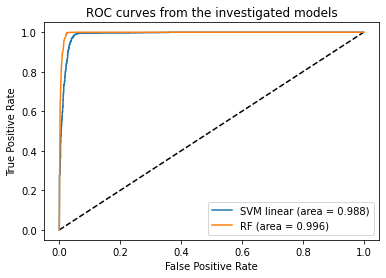

In [70]:
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_SVMlinear, tpr_SVMlinear, label='SVM linear (area = %0.3f)' % roc_auc_SVMlinear)
plt.plot(fpr_rf, tpr_rf, label='RF (area = %0.3f)' % roc_auc_rf)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves from the investigated models')
plt.legend(loc='best')
plt.show()

# Unsupervised modelling:

## SOM

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Minisom library and module is used for performing Self Organizing Maps
from minisom import MiniSom
from sklearn.base import BaseEstimator, TransformerMixin

In [43]:
def classify(som, data):
    """Classifies each sample in data in one of the classes definited
    using the method labels_map.
    Returns a list of the same length of data where the i-th element
    is the class assigned to data[i].
    """
    winmap = som.labels_map(X_train, y_train)
    default_class = np.sum(list(winmap.values())).most_common()[0][0]
    result = []
    for d in data:
        win_position = som.winner(d)
        if win_position in winmap:
            result.append(winmap[win_position].most_common()[0][0])
        else:
            result.append(default_class)
    return result

In [44]:
class MiniSomWrapper(BaseEstimator, TransformerMixin):
    def __init__(self, som_shape=(1, 2), sigma=1.0, learning_rate=0.5, neighborhood_function='gaussian'):
        self.som_shape = som_shape
        self.sigma = sigma
        self.learning_rate = learning_rate
        self.neighborhood_function = neighborhood_function
        self.som = None

    def fit(self, X, y=None):
        self.som = MiniSom(self.som_shape[0], self.som_shape[1], X.shape[1],
                           sigma=self.sigma, learning_rate=self.learning_rate,
                           neighborhood_function=self.neighborhood_function)
        self.som.pca_weights_init(X)
        self.som.train_random(X, 100, verbose=False)
        return self

    def transform(self, X):
        return classify(self.som, X)

    def predict(self, X):
        return self.transform(X)

In [45]:
start = time.time()
# Define the parameter grid
param_grid = {
    'sigma': [1,2, 4, 6],
    'learning_rate': [.05,0.1, 0.5, 0.8],
    'neighborhood_function': ['gaussian', 'triangle']
}

# Create an instance of the MiniSomWrapper model
som = MiniSomWrapper(som_shape=(1, 2))

# Create a grid search object
grid_search = GridSearchCV(som, param_grid, scoring='accuracy', cv=10)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

end = time.time()
hours, rem = divmod(end-start, 3600)
minutes, seconds = divmod(rem, 60)
print("Execution time: "+"{:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds))

/usr/local/lib/python3.6/dist-packages/minisom.py:127: UserWarning: Warning: sigma is too high for the dimension of the map.
  warn('Warning: sigma is too high for the dimension of the map.')
/usr/local/lib/python3.6/dist-packages/minisom.py:282: UserWarning: PCA initialization inappropriate:One of the dimensions of the map is 1.
  warn(msg)
/usr/local/lib/python3.6/dist-packages/minisom.py:287: ComplexWarning: Casting complex values to real discards the imaginary part
  self._weights[i, j] = c1*pc[pc_order[0]] + c2*pc[pc_order[1]]


Execution time: 00:01:44.79


In [46]:
# Print the best parameters and the corresponding classification report
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'learning_rate': 0.1, 'neighborhood_function': 'triangle', 'sigma': 2}


In [47]:
# Calculate the metrics
print('Test Accuracy: %.3f' % accuracy_score(y_test, classify(grid_search.best_estimator_.som, X_test)))
print('Test Precision: %.3f' % precision_score(y_test, classify(grid_search.best_estimator_.som, X_test)))
print('Test Recall: %.3f' % recall_score(y_test, classify(grid_search.best_estimator_.som, X_test)))
print('Test F-1: %.3f' % f1_score(y_test, classify(grid_search.best_estimator_.som, X_test)))

Test Accuracy: 0.710
Test Precision: 0.655
Test Recall: 0.889
Test F-1: 0.754


## K-means clustering 

In [48]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV



In [49]:
start = time.time()

# Define the parameter grid
param_grid = {
    'n_init': [50, 100, 200],
    'init': ['k-means++', 'random'],
    'algorithm': ['auto', 'full', 'elkan']
}

# Create the KMeans instance
kmeans = KMeans(n_clusters = 2)

# Create the GridSearchCV instance
grid_search = GridSearchCV(estimator=kmeans, param_grid=param_grid, cv=10)

# Fit the data to perform grid search
grid_search.fit(X_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Fit the best model on the data
best_model.fit(X_train)

# Predict the cluster labels
labels = best_model.predict(X_test)

end = time.time()
hours, rem = divmod(end-start, 3600)
minutes, seconds = divmod(rem, 60)
print("Execution time: "+"{:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds))

Execution time: 00:21:37.42


In [50]:
# Print the best parameters and score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

Best Parameters:  {'algorithm': 'auto', 'init': 'k-means++', 'n_init': 50}
Best Score:  -2029.9929188646242


In [51]:
# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, labels)
precision = precision_score(y_test, labels, average='macro')
recall = recall_score(y_test, labels, average='macro')
f_score = f1_score(y_test, labels, average='macro')

In [52]:
# Print the evaluation metrics
print("Accuracy: ", round(accuracy,3))
print("Precision: ", round(precision,3))
print("Recall: ", round(recall,3))
print("F-score: ", round(f_score,3))

Accuracy:  0.839
Precision:  0.878
Recall:  0.839
F-score:  0.834
